In [1]:
import numpy as np
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import nibabel as nib
import pandas as pd
from IPython.display import clear_output
import importlib
from skimage import morphology
from skimage.segmentation import find_boundaries
from skimage.morphology import disk, binary_dilation

In [48]:
sys.path.insert(1, "/Users/dvarelat/Documents/MASTER/TFM/methods")
import cardiac_region
importlib.reload(cardiac_region)
import cardiac_region as c

In [36]:
ESPECIMEN = "20190404_E2"
CC = f"/Users/dvarelat/Documents/MASTER/TFM/DATA/CardiacRegion/{ESPECIMEN}/{ESPECIMEN}_mGFP_CardiacRegion_0.5.nii.gz"
gasp = f"/Users/dvarelat/Documents/MASTER/TFM/DATA/RESULTS/membranes/GASP_PNAS/{ESPECIMEN}_mGFP_CardiacRegion_0.5_XYZ_predictions_GASP.nii.gz"


In [37]:
pred_mem = nib.load(gasp).get_fdata()
pred_mem.shape

(1020, 764, 432)

In [39]:
cardiac = nib.load(CC).get_fdata()
cardiac = cardiac[:,:,:,0]
cardiac.shape

(1020, 764, 432)

### RANDOM CROP

380


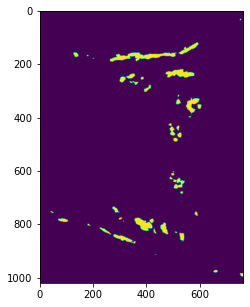

In [44]:
for t in range(20):
    plt.figure(figsize=(5,5)) 
    n = 20*t
    print(n)
    plt.imshow(pred_mem[:,:,n])
    plt.show()
    clear_output(wait=True)

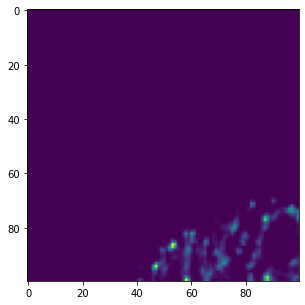

In [65]:
crop = cardiac[100:200,100:200,100:200]
for t in range(20):
    plt.figure(figsize=(5,5)) 
    n = 5*t
    plt.imshow(crop[:,:,n])
    plt.show()
    clear_output(wait=True)

In [66]:
saveNifti(crop, c.load3D_metadata(gasp), "/Users/dvarelat/Documents/MASTER/TFM/DATA/CROP/0190404_E2_mGFP_CC_xyz100_200.nii.gz")

In [67]:
saveNifti(pred_mem[100:200,100:200,100:200], c.load3D_metadata(gasp), "/Users/dvarelat/Documents/MASTER/TFM/DATA/CROP/pred_20190404_E2_mGFP_CC_xyz100_200.nii.gz")

In [58]:
# Guarda arrays 3D en formato Nifti
def saveNifti(array_3D, array_dim_info, save_path, vox_units="um"):
    units_dict = {"um": 3, "mm": 2, "m": 1, "pixel": 0}
    tipo = array_3D.dtype.name
    if "uint" in tipo:
        bit_depth = 2 ** int(array_3D.dtype.name.split("uint")[1]) - 1
    elif "uint" in tipo:
        bit_depth = 255
    img = nib.Nifti1Image(array_3D, np.eye(4))
    # Se especifican unidades, dimensiones y tamano de pixel
    Dimensions = np.asarray(
        [
            1.0,
            array_dim_info["x_res"],
            array_dim_info["y_res"],
            array_dim_info["z_res"],
            1.0,
            0.0,
            0.0,
            0.0,
        ],
        dtype="float32",
    )
    img.header["pixdim"] = Dimensions
    img.header["xyzt_units"] = units_dict[vox_units]

    if "uint" in tipo:
        img.header["cal_max"] = bit_depth
    # Se guarda
    nib.save(img, save_path)

In [56]:
CC

'/Users/dvarelat/Documents/MASTER/TFM/DATA/CardiacRegion/20190404_E2/20190404_E2_mGFP_CardiacRegion_0.5.nii.gz'